Import necessary libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [67]:
# train data
train_data=pd.read_csv('/content/train_ctrUa4K.csv')


In [68]:
# test data
test_data=pd.read_csv('/content/test_lAUu6dG.csv')

Exploratory data analysis

In [69]:
# Understanding the data
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [70]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [71]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


*Target Variable*

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table and bar plot.

The frequency table of a variable will give us the count of each category in that variable.

<Axes: >

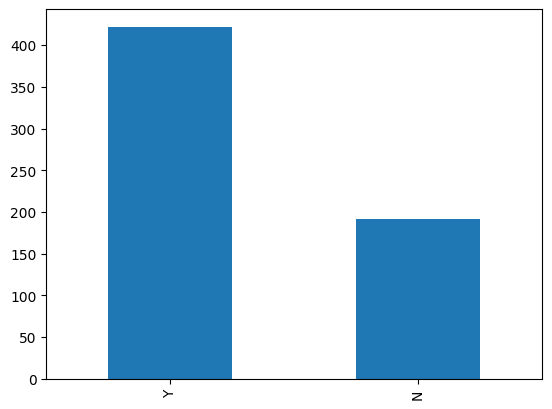

In [75]:
train_data['Loan_Status'].value_counts().plot.bar()

In [76]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [77]:
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

422(around 69%) people out of 614 got the approval.

*Now, let’s visualize each variable separately.*

Independent Variables (Categorical)

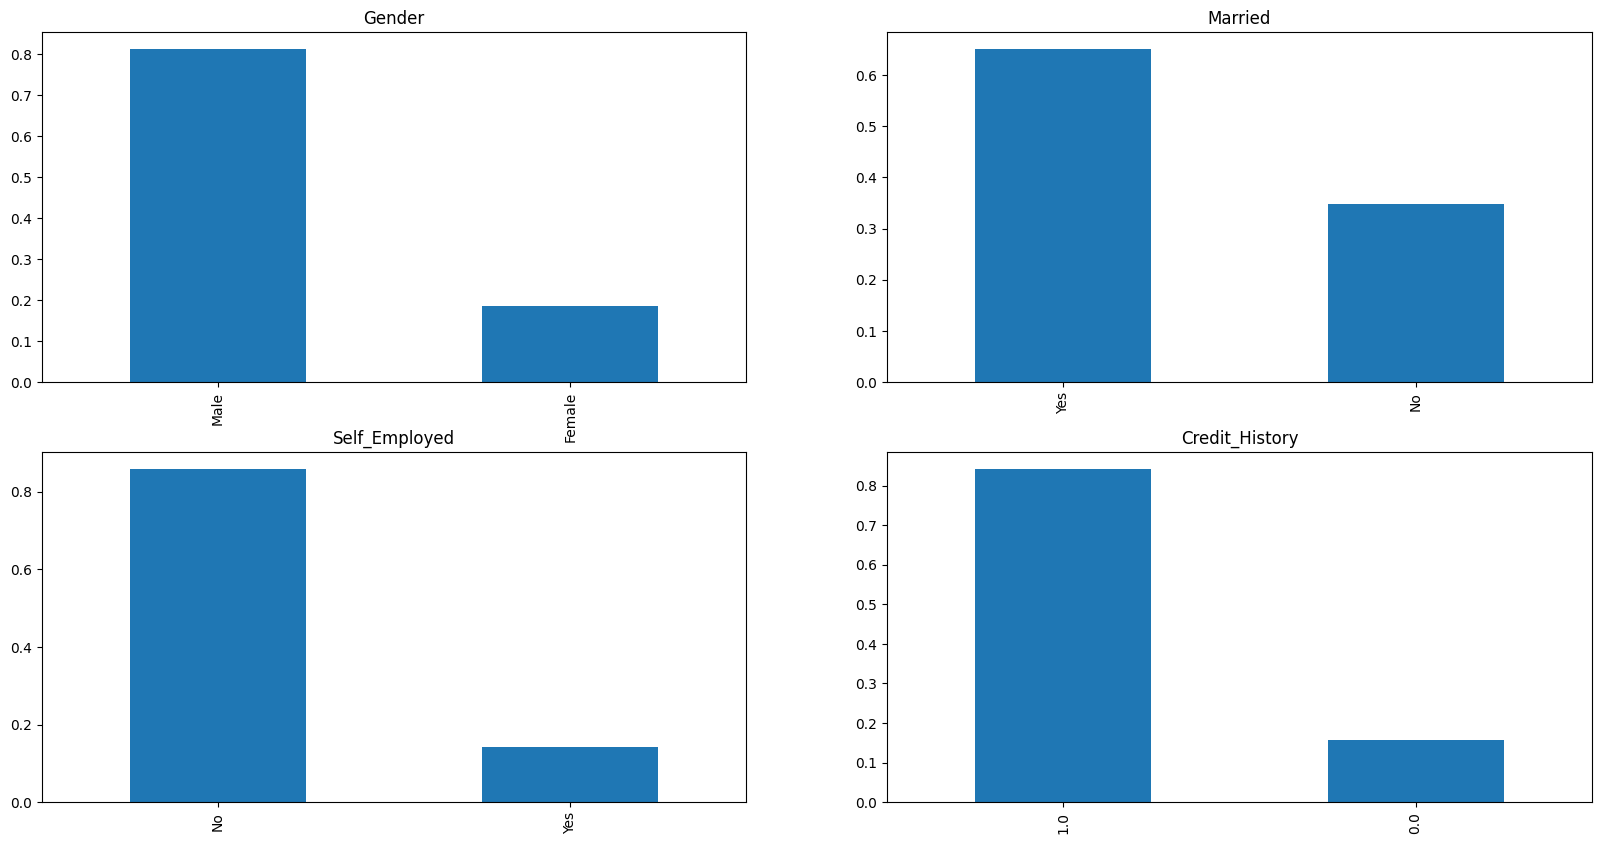

In [78]:
plt.figure(1)
plt.subplot(221)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

It can be inferred from the above bar plots that:

80% of applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
About 15% of applicants in the dataset are self-employed.
About 85% of applicants have repaid their debts.

Independent Variable (Ordinal)

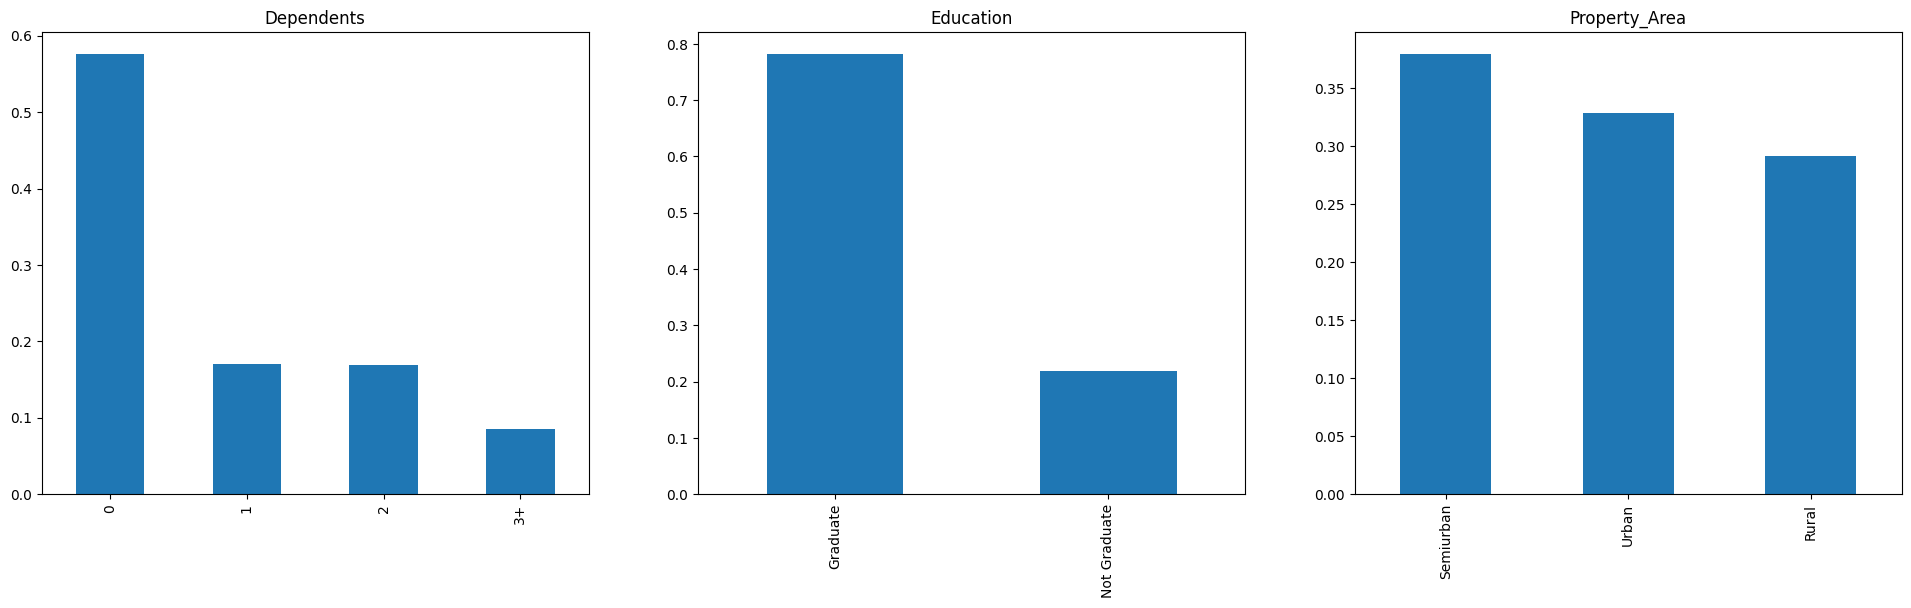

In [79]:
plt.figure(1)
plt.subplot(131)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have dependents.
About 80% of the applicants are graduates.
Most of the applicants are from semi-urban areas.

*Categorical Independent Variable vs Target Variable.*

First of all, we will find the relation between the target variable and categorical independent variables.

<Axes: xlabel='Gender'>

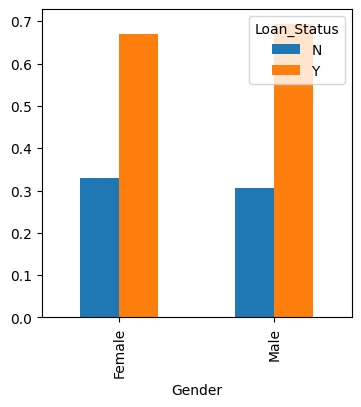

In [80]:
Gender=pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

In [81]:
# It can be inferred that the proportion of male and female applicants
# is more or less the same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs the target variables.

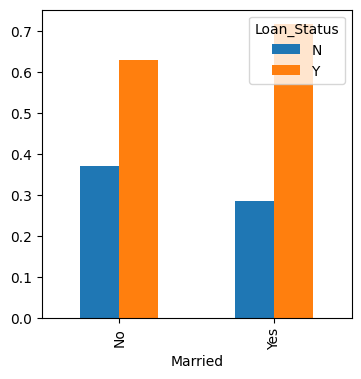

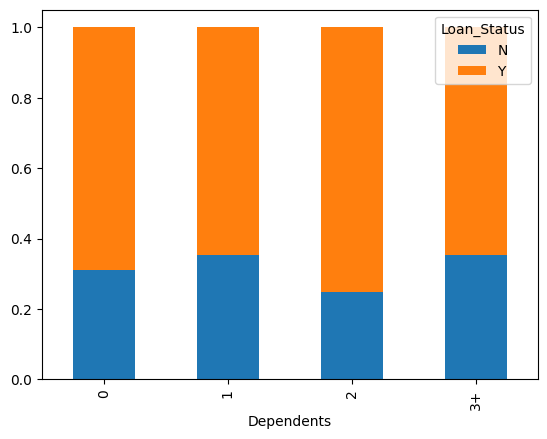

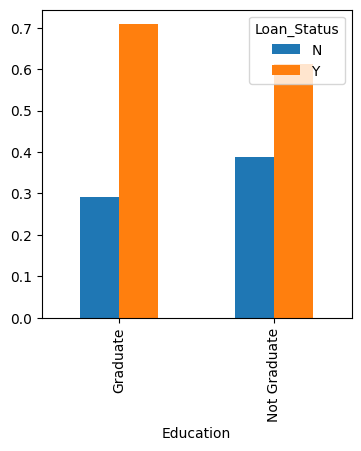

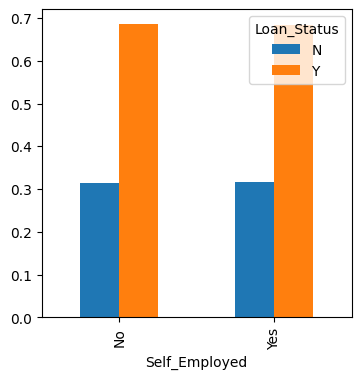

In [82]:
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

In [83]:
# The proportion of married applicants is higher for the approved loans.
# The distribution of applicants with 1 or 3+ dependents is similar across
# both the categories of Loan_Status.

Now we will look at the relationship between the remaining categorical independent variables and Loan_Status.

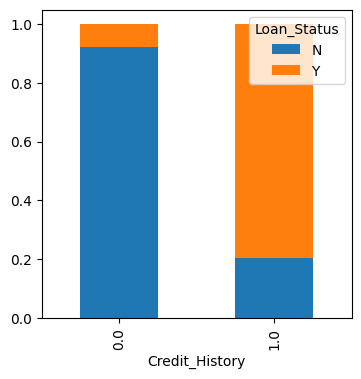

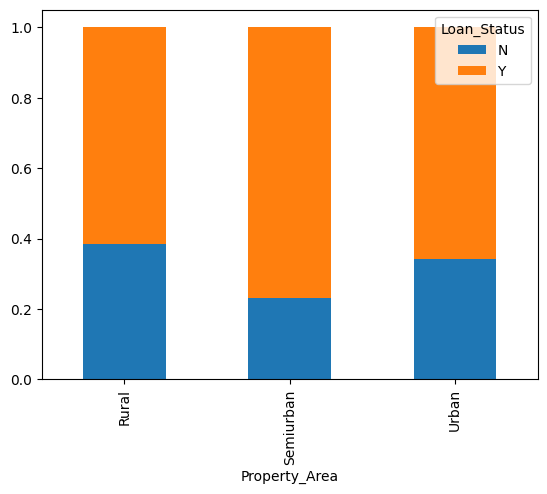

In [84]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [85]:
# It seems people with a credit history of 1 are more likely to get their loans approved.
# The proportion of loans getting approved in semi-urban areas is higher as compared to that
# in rural or urban areas.

*Now let’s visualize numerical independent variables with respect to the target variable.*

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

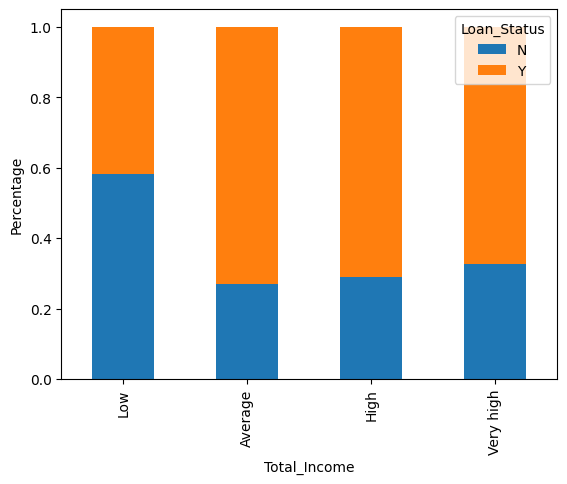

In [86]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [87]:
# We can see that Proportion of loans getting approved for applicants having low Total_Income
# is very less as compared to that of applicants with Average, High, and Very High Incom

Let’s visualize the Loan amount variable.

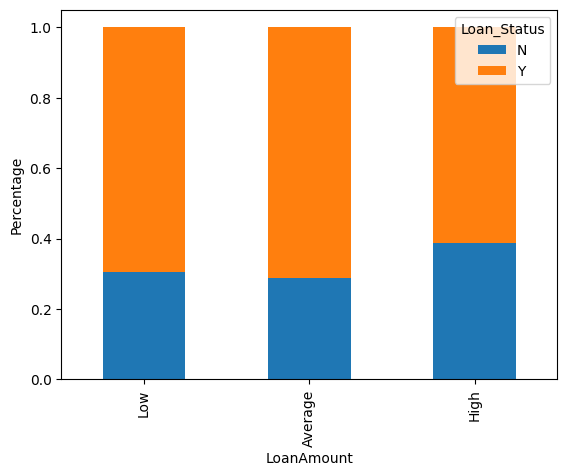

In [88]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [89]:
# It can be seen that the proportion of approved loans
# is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts

In [90]:
train_data=train_data.drop(['LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)
train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker colors mean their correlation is more.

<ipython-input-91-4f3741e40ceb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train_data.corr()


<Axes: >

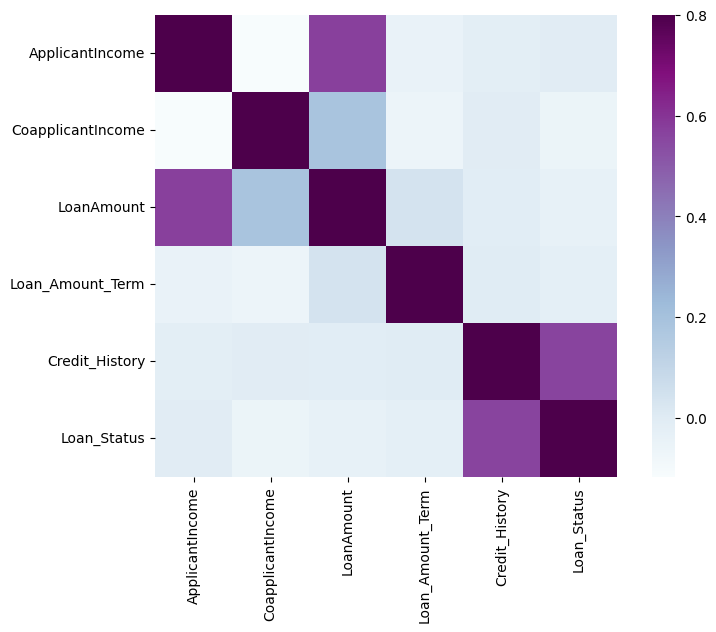

In [91]:
matrix = train_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [92]:
# We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status).
# LoanAmount is also correlated with applicantIncome.

**Data Preprocessing**

*Handling Missing Values of train data*

In [93]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
# We fill categorical variables with mode value:
train_data['Gender'].fillna(train_data['Gender'].mode().values[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode().values[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode().values[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode().values[0],inplace=True)

In [95]:
# We fill numerical variables with mean value
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mean(),inplace=True)

In [96]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Handling Missing Values of test data

In [97]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [98]:
test_data['Gender'].fillna(test_data['Gender'].mode().values[0],inplace=True)
test_data['Dependents'].fillna(test_data['Gender'].mode().values[0],inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode().values[0],inplace=True)

In [99]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(),inplace=True)

In [100]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Managing Outliers

Text(0.5, 1.0, 'Boxplot for LoanAmount')

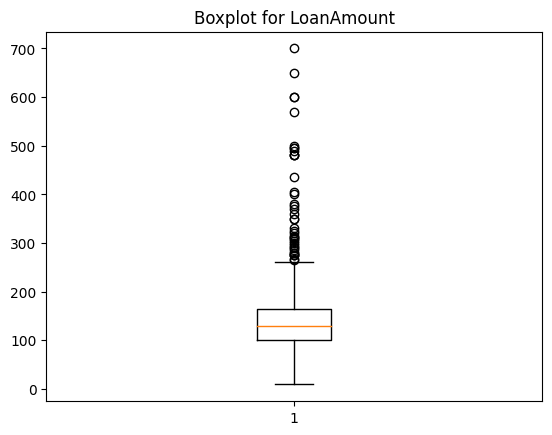

In [101]:
plt.boxplot(train_data['LoanAmount'])
plt.title('Boxplot for LoanAmount')

In [102]:
# LoanAmount contains outliers so we have to treat them as the presence of outliers
# affects the distribution of the data.

In [103]:
# Here we do log transformation:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

**Model building**

Let’s drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [104]:
train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [105]:
X = train_data.drop('Loan_Status',1)
y = train_data.Loan_Status

<ipython-input-105-570bb8ad0334>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_data.drop('Loan_Status',1)


Now we will make dummy variables for the categorical variables.

In [106]:
X=pd.get_dummies(X)
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

 Now we will train the model on the training dataset and make predictions for the test dataset.

 We will use the train_test_split function from sklearn to divide our train dataset. So first, let us import train_test_split.

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Let’s predict the Loan_Status for the test set and calculate its accuracy.

In [110]:
pred = lr_model.predict(x_test)

In [111]:
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [112]:
accuracy_score(y_test,pred)

0.7837837837837838

In [113]:
# Here we will use Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=1)

In [114]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [115]:
y_pred=rf.predict(x_test)

In [116]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [117]:
accuracy_score(y_test,y_pred)

0.7783783783783784

Let us read the sample submission file:

In [118]:
sample = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [119]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


Let us build a dataframe combining prediction values and loan id

In [120]:
df1=pd.DataFrame(pred,columns=["Loan_Status"])

Replace 1 and 0 with yes and no

In [121]:
df1=df1.replace(1,'Y')

In [122]:
df1=df1.replace(0,'N')

Let us replace loan status column with our prediction values

In [123]:
sample=sample.drop(columns=['Loan_Status'],axis=1)

In [124]:
sample['Loan_Status']=df1['Loan_Status']

In [125]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


 Use the to_csv() method to convert the dataset to a CSV file

In [126]:
sample.to_csv('samplenew.csv', index=False)